<div style="text-align: center;">
    <h1> <b> Penerapan CNN untuk Identifikasi Tumor Otak pada Lansia Berdasarkan Citra MRI
</b></div>

<div>
    <h3> <b>Anggota Kelompok</b></div>
    <ol>
        <li><h4>LALU ZHAFRAN FARRAS RAHMAN (F1D021050)</h4></li>
        <li><h4> PUTU INDAH PUSPITA DEWI (F1D022020)</h4></li>
        <li><h4> RIZKI RAHMAN MAULANA (F1D022093)</h4></li>
    </ol>
</div>

## **Pendahuluan**

### **Latar Belakang Topik**

Tumor otak pada lansia memerlukan deteksi dini yang cepat dan akurat untuk meningkatkan keberhasilan pengobatan. Pendekatan berbasis Convolutional Neural Network (CNN) menawarkan solusi efisien untuk identifikasi tumor dengan memanfaatkan dataset citra MRI yang berlabel. Melalui pelatihan model pada data ini, CNN mampu mengenali pola unik tumor secara otomatis tanpa intervensi manual. Penelitian ini bertujuan mengembangkan model CNN untuk mendeteksi tumor otak pada lansia dengan fokus pada akurasi tinggi, sehingga dapat mendukung layanan kesehatan yang lebih efektif.

### **Latar Belakang Metode**

Convolutional Neural Network (CNN) adalah metode pembelajaran mendalam yang dirancang untuk menganalisis data citra, seperti MRI, dengan mengekstraksi fitur penting secara otomatis melalui lapisan konvolusi dan pooling. Dalam identifikasi tumor otak, CNN mampu membedakan jaringan sehat dan tumor tanpa proses ekstraksi fitur manual, menjadikannya metode yang efektif dan efisien. Penelitian ini memanfaatkan CNN untuk mendeteksi tumor otak pada lansia, dengan fokus pada pemilihan arsitektur yang optimal dan evaluasi kinerja model untuk mendukung diagnosis medis yang cepat dan akurat.

## **Pembahasan**

### **Menyediakan Library Yang Akan Digunakan**

`google.colab.drive` : Modul untuk menghubungkan Google Colab dengan Google Drive, memungkinkan pengguna mengakses file dan folder yang disimpan di Google Drive dari lingkungan Colab.

`tensorflow` : Framework pembelajaran mesin yang populer untuk membangun dan melatih model deep learning. Digunakan untuk berbagai tugas seperti pemrosesan citra, NLP, dan lainnya.

`tensorflow.keras.preprocessing.image.ImageDataGenerator` : Kelas untuk menghasilkan batch data gambar dengan augmentasi secara real-time, seperti rotasi, flipping, scaling, atau normalisasi, guna meningkatkan performa model.

`tensorflow.keras.preprocessing.image.load_img` : Fungsi untuk memuat gambar dari disk ke format yang dapat digunakan oleh TensorFlow.

`tensorflow.keras.preprocessing.image.img_to_array` : Fungsi untuk mengonversi gambar yang dimuat ke array numpy, yang kompatibel dengan TensorFlow.

`matplotlib.pyplot` : Modul untuk membuat visualisasi data, seperti grafik atau plot, yang memudahkan analisis data.

`tensorflow.keras.layers.Conv2D` : Lapisan konvolusi 2D dalam CNN untuk mengekstrak fitur spasial dari data gambar.

`tensorflow.keras.layers.MaxPool2D` : Lapisan pooling untuk mengurangi dimensi fitur gambar dan mencegah overfitting dengan memilih nilai maksimum dalam area tertentu.

`tensorflow.keras.layers.Dense` : Lapisan fully connected yang digunakan untuk pengambilan keputusan pada akhir model.

`tensorflow.keras.layers.Flatten` : Lapisan untuk mengubah data multi-dimensi menjadi bentuk vektor satu dimensi untuk diproses oleh lapisan Dense.

`tensorflow.keras.layers.Dropout` : Lapisan untuk mencegah overfitting dengan secara acak menonaktifkan sejumlah unit selama pelatihan.

tensorflow.keras.layers.Input : Lapisan input untuk mendefinisikan bentuk input data ke dalam model.

`tensorflow.keras.models.Sequential` : Kelas untuk membuat model neural network dengan urutan lapisan yang linear.

`os` : Modul bawaan Python untuk berinteraksi dengan sistem file, seperti membaca atau menulis file, dan memanipulasi path.

`numpy` : Library untuk komputasi numerik, menyediakan struktur array multi-dimensi dan fungsi matematika yang cepat dan efisien.

`sklearn.model_selection.train_test_split` : Fungsi untuk membagi dataset menjadi set pelatihan dan pengujian, mempermudah evaluasi performa model.

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential
import os
import numpy as np
from sklearn.model_selection import train_test_split

### **Mengimport Dataset**

Code `drive.mount('/content/drive')` digunakan untuk menghubungkan Google Drive ke Google Colab, sehingga file dan folder di Drive dapat diakses langsung di direktori `/content/drive` setelah autentikasi.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/tubesjst/BRAIN.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/tes1')
zip_ref.close()

Kode ini digunakan untuk mengekstrak file ZIP yang ada di Google Drive. Pertama, modul `zipfile` diimpor untuk mengelola file ZIP. File ZIP dengan path lokal `'/content/drive/MyDrive/tubesjst/BRAIN.zip'` dibuka dalam mode baca menggunakan `zipfile.ZipFile`. Kemudian, isi file ZIP diekstrak ke direktori tujuan `'/content/tes'`. Setelah selesai, file ZIP ditutup dengan `zip_ref.close()`. Kode ini berguna untuk mempersiapkan dataset atau file lain yang terkompresi untuk digunakan di Google Colab.

### **Memuat Gambar dan Membagi Data menjadi Training dan Testing**

Selanjutnya, memuat dan mempersiapkan dataset gambar untuk pelatihan model. Pertama, folder dataset diset di `data_dir`, dan kategori dataset diambil menggunakan `os.listdir()` untuk mendapatkan subfolder yang mewakili kelas. Kemudian, gambar dimuat dari setiap kategori, diubah ukurannya menjadi 150x150 piksel, dan dikonversi menjadi array menggunakan `img_to_array()`.

**Kenapa perlu diubah ke array ?** Gambar perlu diubah ke array karena model pembelajaran mesin, seperti CNN, memproses data dalam bentuk numerik. Gambar asli biasanya berupa data piksel yang disimpan dalam format gambar (seperti JPEG atau PNG), sedangkan model membutuhkan data dalam bentuk array (numerik) untuk melakukan perhitungan.

In [ ]:
# Folder dataset lokal
data_dir = "/content/tes1"
categories = os.listdir(data_dir)  # Folder dataset diorganisir berdasarkan kategori

# Inisialisasi array untuk menyimpan data gambar (X) dan labelnya (y)
X, y = [], []

# Memuat gambar dari setiap kategori
for label, category in enumerate(categories):  # Mengiterasi setiap kategori dengan indeks sebagai label
    category_path = os.path.join(data_dir, category)  # Mendapatkan path folder kategori
    for img_file in os.listdir(category_path):  # Mengiterasi file gambar dalam kategori
        img_path = os.path.join(category_path, img_file)  # Mendapatkan path file gambar
        img = load_img(img_path, target_size=(150, 150))  # Memuat gambar dan mengubah ukurannya menjadi 150x150
        img_array = img_to_array(img)  # Mengubah gambar menjadi array numerik
        X.append(img_array)  # Menambahkan array gambar ke dalam list X
        y.append(label)  # Menambahkan label kategori ke dalam list y

# Mengonversi data gambar dan label dari list ke array NumPy
X = np.array(X)  # Data gambar sebagai array
y = np.array(y)  # Label sebagai array

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Code diatas telah membagi dataset dengan proporsi 70% untuk pelatihan dan 30% untuk pengujian.

Setelah itu, kode berikut mencetak dimensi dari data pelatihan dan pengujian `(X_train, X_test, y_train, y_test)` untuk memverifikasi ukuran dataset yang digunakan.

In [ ]:
print("X Train: {} \nX Test: {} \ny Train: {} \ny test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train: (3998, 150, 150, 3) 
X Test: (1714, 150, 150, 3) 
y Train: (3998,) 
y test: (1714,)


### **Menampilkan Data dari Setiap Kelas**

Mencoba menampilkan 5 gambar pertama dari setiap kategori dalam dataset, dengan ukuran gambar yang disesuaikan menjadi 150x150 piksel, untuk memvisualisasikan contoh data dari setiap kelas.

Class: NOTUMOR


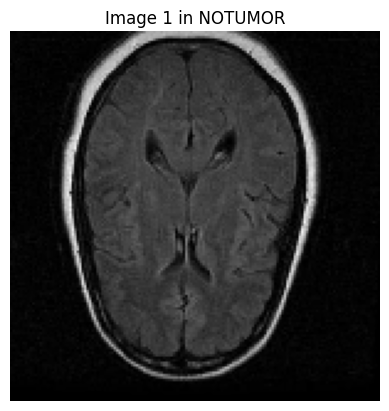

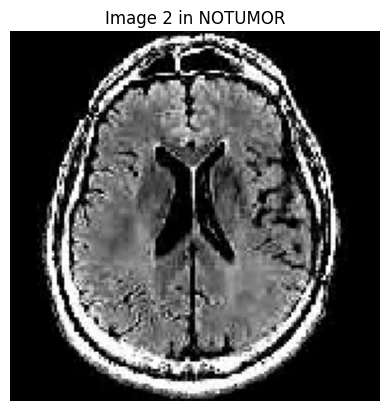

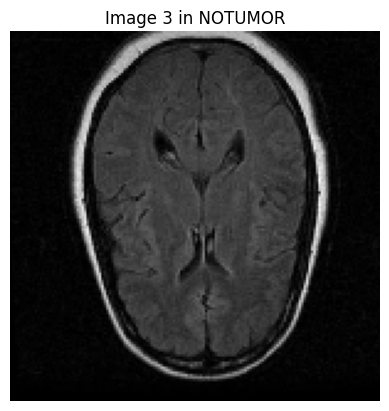

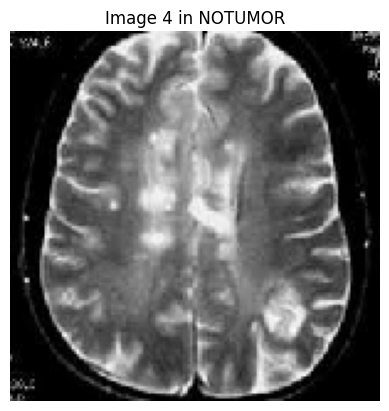

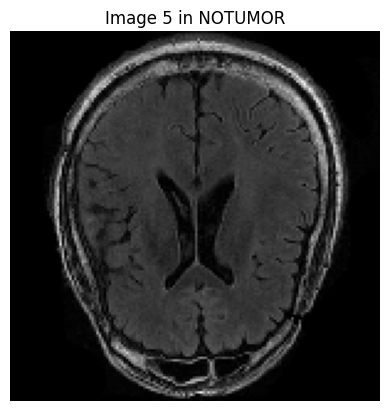

Class: MENINGIOMA


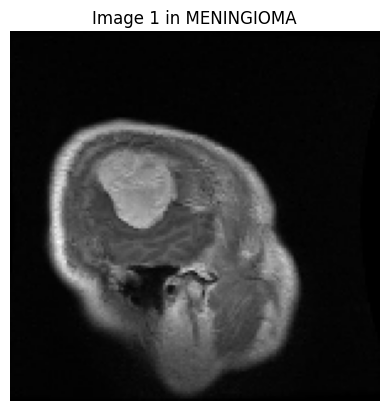

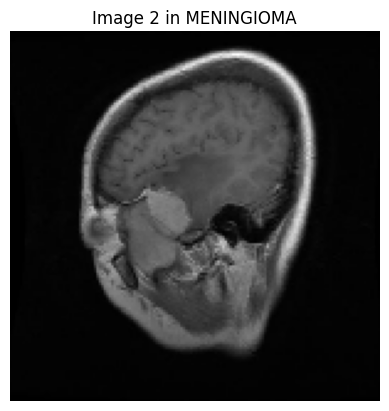

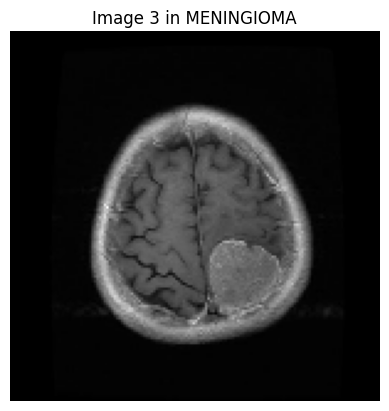

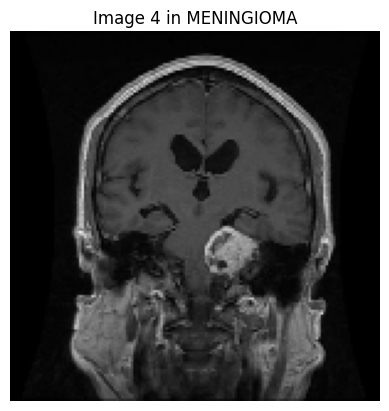

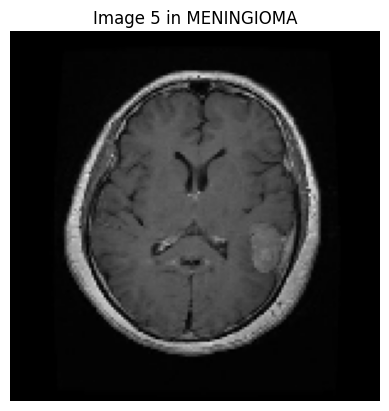

Class: GLIOMA


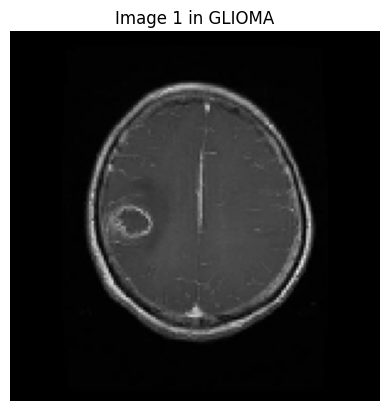

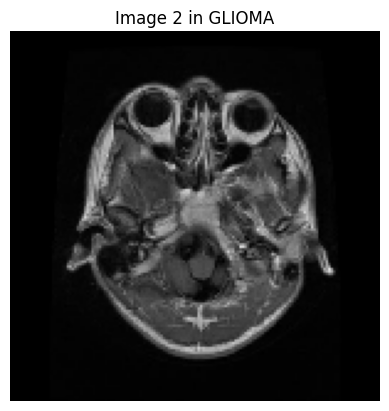

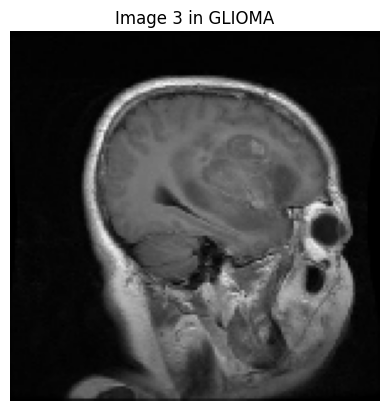

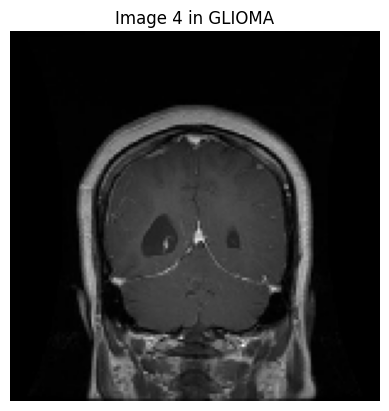

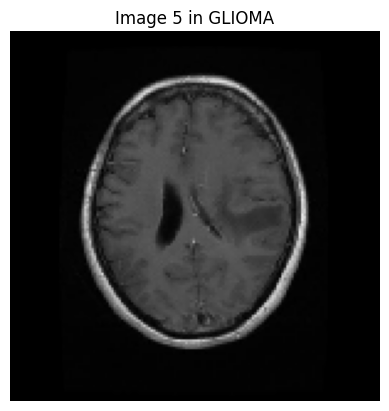

Class: PITUITARY


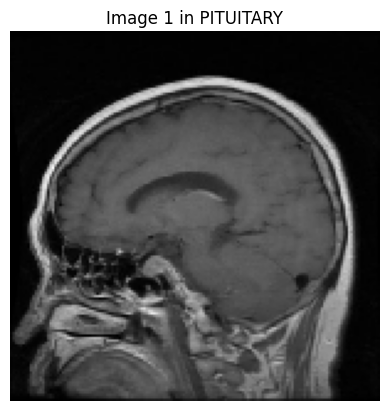

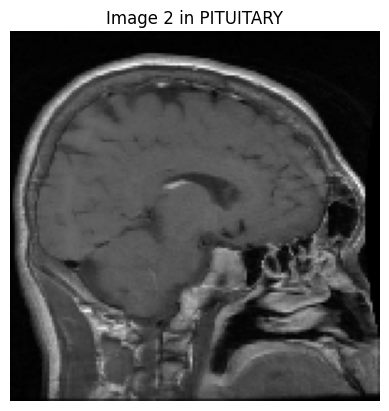

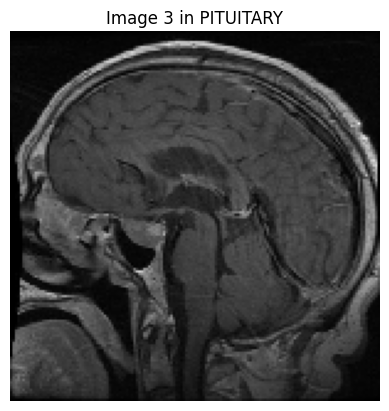

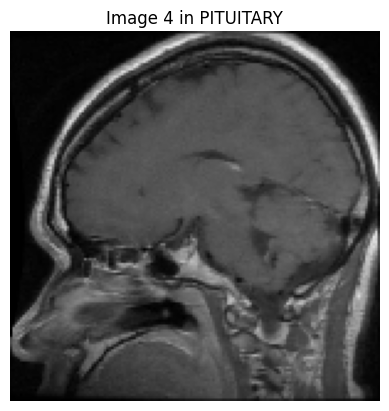

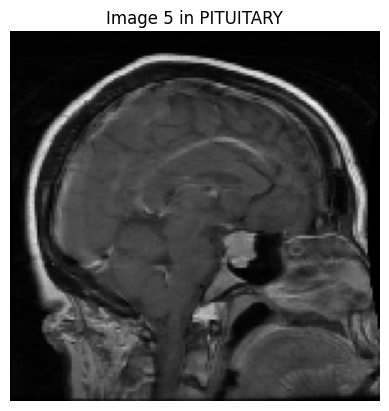

In [ ]:
# Menentukan jumlah gambar yang ingin ditampilkan per kelas
num_images_per_class = 5  # Menampilkan maksimal 5 gambar per kelas

# Loop untuk menampilkan gambar dari setiap kelas
for category_index, category in enumerate(categories):  # Mengiterasi setiap kategori dengan indeksnya
    print(f"Class: {category}")  # Menampilkan nama kelas saat ini
    category_path = os.path.join(data_dir, category)  # Mendapatkan path folder untuk kategori ini
    image_files = os.listdir(category_path)  # Mendapatkan daftar semua file gambar di folder kategori

    # Loop untuk menampilkan gambar hingga maksimal 'num_images_per_class'
    for i in range(min(num_images_per_class, len(image_files))):
        # Mengecek jumlah gambar yang tersedia (tidak melebihi jumlah total gambar dalam kategori)
        img_path = os.path.join(category_path, image_files[i])  # Mendapatkan path gambar
        img = load_img(img_path, target_size=(150, 150))  # Memuat gambar dan mengubah ukurannya menjadi 150x150
        plt.imshow(img)  # Menampilkan gambar menggunakan Matplotlib
        plt.title(f"Image {i+1} in {category}")  # Memberikan judul pada gambar (nomor dan nama kelas)
        plt.axis('off')  # Menyembunyikan sumbu (axis) untuk tampilan yang lebih bersih
        plt.show()  # Menampilkan gambar ke output


Gambar perlu di dikonversi label target `(y_train dan y_test)` ke format `one-hot encoding`, yang mengubah label numerik menjadi vektor biner. Setiap label dikonversi menjadi vektor dengan panjang sama dengan jumlah kelas (4 kelas dalam hal ini), di mana nilai 1 menunjukkan kelas yang benar dan 0 untuk kelas lainnya, sehingga model dapat lebih mudah memprosesnya dalam klasifikasi.

Pada Label :
- "NOTUMOR" → [1, 0, 0, 0]
- "MENINGIOMA" → [0, 1, 0 ,0]
- "GLIOMA" → [0, 0, 1 ,0]
- "PITUITARY" →  [0, 0, 0 ,1]

In [ ]:
# Konversi target data to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

### **Melakukan Preprocessing pada Dataset**

Disini kami melakukan proses augmentasi dengan beberapa process :
- `rotation_range=20` : Mengaktifkan rotasi acak gambar dalam rentang -20 hingga 20 derajat.
- `shear_range=0.2` : Mengaktifkan geseran (shear) acak pada gambar dalam rentang -0.2 hingga 0.2.
- `rescale = 1./255` : Menormalisasi pixel gambar dengan membaginya dengan 255 untuk skala 0-1.
- `zoom_range=0.2` : Menambahkan zoom acak pada gambar dalam rentang 0 hingga 0.2.
- `horizontal_flip=True` : Mengaktifkan pembalikan horizontal gambar secara acak.
- `fill_mode='nearest'` : Mengisi piksel yang hilang dengan nilai piksel terdekat/tetangga setelah transformasi.



In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    rescale = 1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Kemudian melakukan augmentasi data pelatihan, menghasilkan batch dengan ukuran 32, dan menghitung jumlah data setelah augmentasi.



1. **Augmentasi Data**:
   - Baris `train_datagen.flow(X_train, y_train, batch_size=32)` digunakan untuk melakukan augmentasi pada data latih.
   - Augmentasi meningkatkan keragaman data dengan teknik seperti rotasi, flipping, zooming, dan lainnya.

2. **Menghitung Data Setelah Augmentasi**:
   - Augmentasi memperbanyak data dengan menggandakan data asli hingga 5 kali lipat.
   - `augmented_data_size = len(X_train) * 5` digunakan untuk menghitung jumlah total data setelah augmentasi.

3. **Output**:
   - `print("Jumlah data setelah augmentasi:", augmented_data_size)` mencetak jumlah data setelah augmentasi untuk memastikan prosesnya berhasil.


In [ ]:
# Augmentasi data training
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

augmented_data_size = len(X_train) * 5

print("Jumlah data setelah augmentasi:", augmented_data_size)


Jumlah data setelah augmentasi: 19990


line dibawah menggunakan `ImageDataGenerator` untuk mengatur augmentasi dan normalisasi data. Pada bagian pertama, `test_datagen = ImageDataGenerator(rescale=1./255)` bertujuan untuk menormalkan data uji dengan mengubah nilai piksel dari skala 0-255 menjadi 0-1. Normalisasi ini membantu model berlatih dengan lebih efisien.

Bagian terakhir, `validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)`, digunakan untuk mempersiapkan data validasi. Tidak ada augmentasi yang dilakukan pada data validasi; hanya normalisasi untuk memastikan konsistensi dengan data latih.

line ini mengoptimalkan proses validasi model dengan normalisasi pada data uji.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=32
)

### **Membuat Model CNN**

Dalam membangun model CNN, disini kami menggunakan arsitektur Sequential untuk menambahkan layer secara berurutan. adapun urutan stepnya sebagai berikut :

- **Step Input Layer** : Model dimulai dengan layer input, yang menerima gambar dengan dimensi (150, 150, 1), menunjukkan ukuran gambar dan jumlah channel warna (1 untuk grayscale).

- **Step Convolusi dan MaxPooling** : Layer pertama adalah layer konvolusi dengan 32 filter, ukuran kernel 3x3, stride 1x1, dan fungsi aktivasi ReLU. Setelah itu, diterapkan MaxPooling dengan ukuran pool 2x2 dan stride 2.
Layer kedua menambahkan 64 filter pada konvolusi dengan konfigurasi serupa dan diikuti MaxPooling. Layer ketiga memiliki 128 filter pada konvolusi, juga diikuti MaxPooling. Setiap layer konvolusi dirancang untuk menangkap pola fitur dari gambar secara bertahap, dari pola sederhana hingga kompleks.

- **Step Flatten** : Setelah proses konvolusi dan pooling, layer Flatten digunakan untuk mengubah matriks hasil pooling menjadi vektor 1 dimensi. Vektor ini menjadi input untuk layer fully connected.

- **Step Fully Connected** : Layer fully connected pertama memiliki 128 neuron dengan fungsi aktivasi ReLU dan menggunakan Dropout 0.5 untuk mencegah overfitting. Layer kedua memiliki 64 neuron dengan konfigurasi serupa.

- **Step Output** : Layer output menggunakan 4 neuron dengan fungsi aktivasi softmax untuk menghasilkan probabilitas klasifikasi pada setiap kelas.

- **Step Compile Model** : Model dikompilasi menggunakan optimizer Adam, loss function categorical_crossentropy, dan metrik akurasi. Model ini kemudian dirangkum menggunakan fungsi summary untuk melihat detail arsitektur dan jumlah parameter yang dapat dilatih.

In [ ]:
# Inisialisasi CNN Model
cnn = Sequential()

# Tambahkan input layer
cnn.add(Input(shape=(150, 150, 3)))

# Tambahkan convolutional layer pertama
cnn.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))

# Tambahkan convolutional layer kedua
cnn.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))

# Tambahkan convolutional layer ketiga
cnn.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))

# Tambahkan flattening layer
cnn.add(Flatten())

# Fully connected layer pertama
cnn.add(Dense(units=128, activation="relu"))
cnn.add(Dropout(0.5))

# Fully connected layer kedua
cnn.add(Dense(units=64, activation="relu"))
cnn.add(Dropout(0.5))

# Tambahkan output layer
cnn.add(Dense(units=4, activation="softmax"))

# Compile model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# Optimizer Adam digunakan untuk pembaruan bobot
# Loss function 'categorical_crossentropy' untuk klasifikasi multikategori
# Metode evaluasi menggunakan akurasi

cnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,836,868 (18.45 MB)

 Trainable params: 4,836,868 (18.45 MB)

 Non-trainable params: 0 (0.00 B)

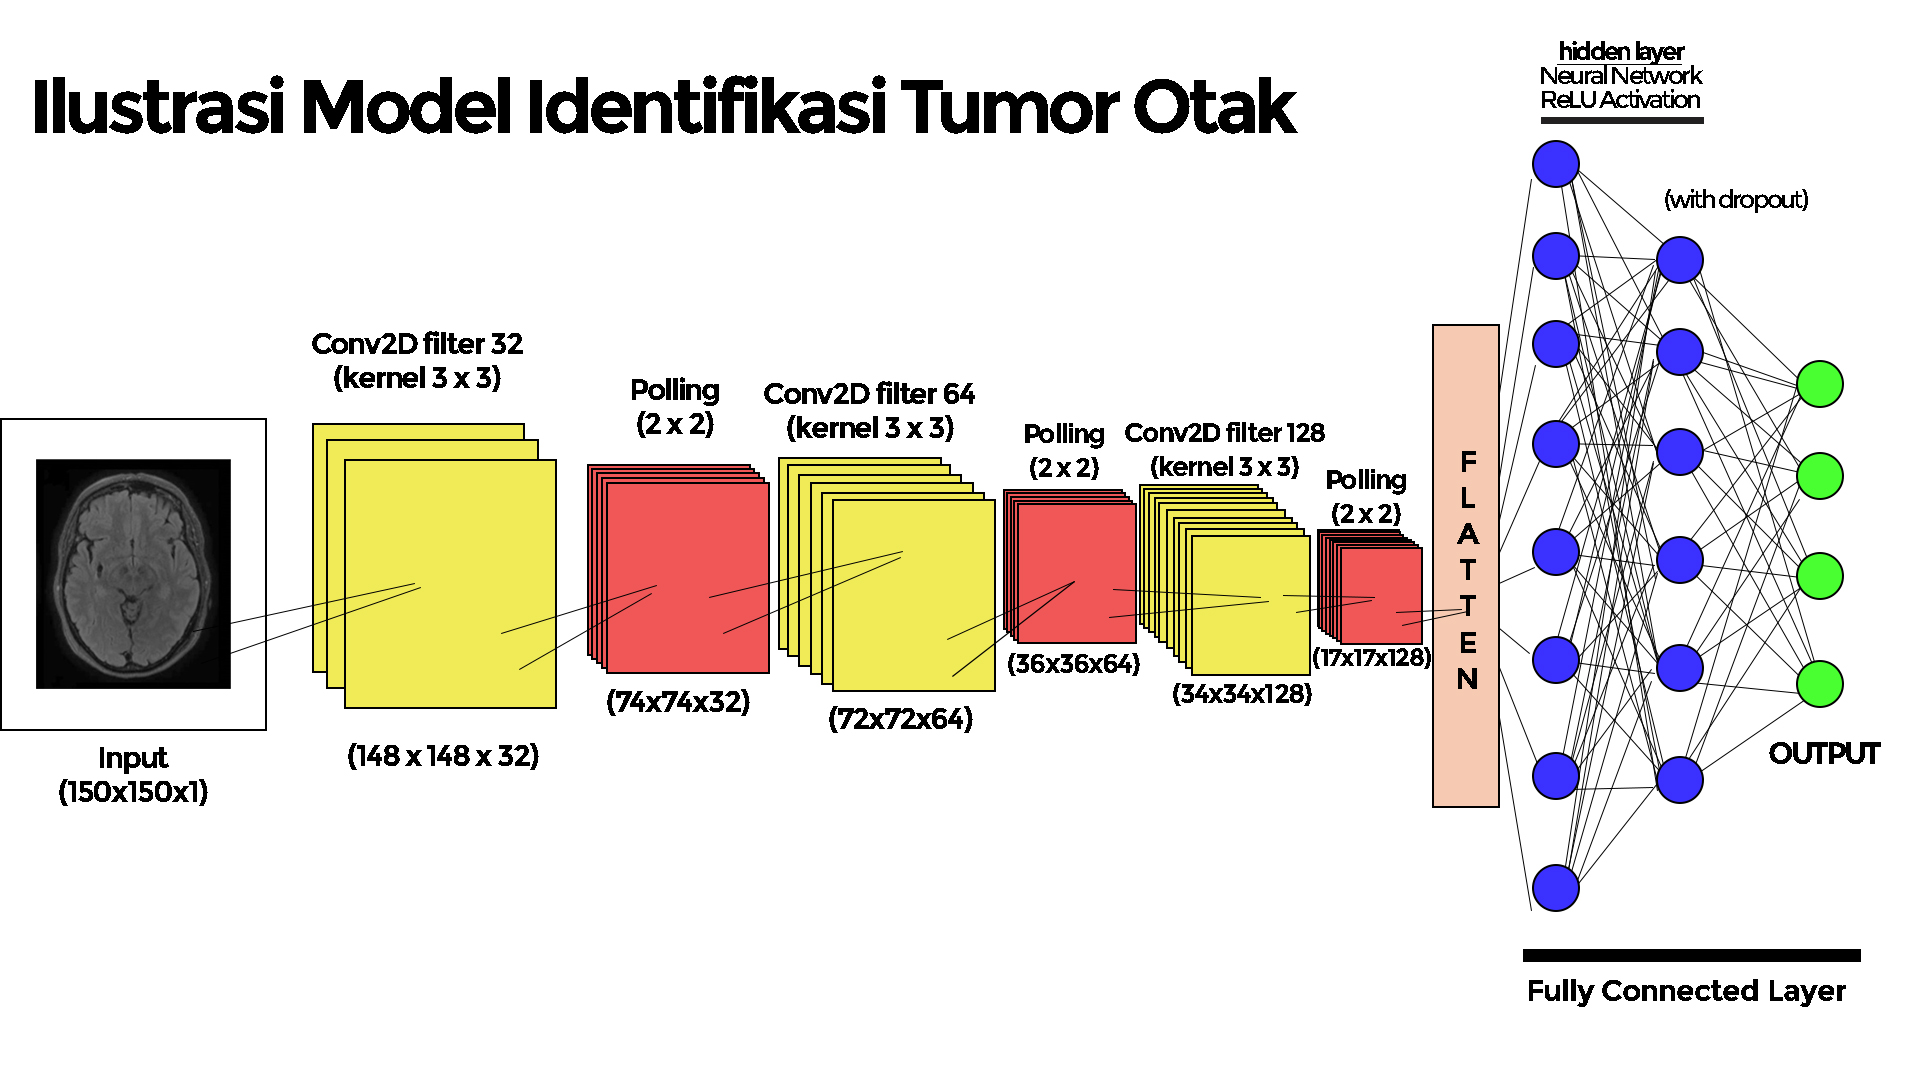

### **Evaluasi Model CNN**

Langkah awal dalam melakukan evaluasi yaitu, menggunakan `EarlyStopping` untuk menghentikan pelatihan model secara otomatis jika metrik yang dipantau (misalnya `val_loss`) tidak membaik selama 5 epoch berturut-turut, sekaligus mengembalikan bobot terbaik dari epoch dengan performa terbaik. Selain itu, hal ini juga berfungsi untuk mencegah `overfitting`.

In [ ]:
 from tensorflow.keras.callbacks import EarlyStopping
 early_stopping = EarlyStopping(
     monitor='val_loss',      # Metrik yang dipantau
     patience=5,              # Jumlah epoch tanpa peningkatan sebelum berhenti
     restore_best_weights=True  # Mengembalikan bobot model dari epoch terbaik
 )

Selanjutnya, melatih model CNN selama maksimal 30 epoch menggunakan data training dan validasi, dengan menghentikan pelatihan lebih awal jika kondisi yang ditentukan oleh EarlyStopping terpenuhi.

In [ ]:
model_evaluation = cnn.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 291ms/step - accuracy: 0.3967 - loss: 1.2720 - val_accuracy: 0.6908 - val_loss: 0.7975
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 236ms/step - accuracy: 0.6222 - loss: 0.9012 - val_accuracy: 0.5992 - val_loss: 1.0017
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.6882 - loss: 0.7630 - val_accuracy: 0.6085 - val_loss: 0.9644
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 207ms/step - accuracy: 0.7196 - loss: 0.6916 - val_accuracy: 0.6278 - val_loss: 1.0091
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 188ms/step - accuracy: 0.7619 - loss: 0.6100 - val_accuracy: 0.7894 - val_loss: 0.5754
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 223ms/step - accuracy: 0.7685 - loss: 0.6145 - val_accuracy: 0.7089 - val_loss: 0.7995
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.7940 - loss: 0.5412 - val_accuracy: 0.8057 - val_loss: 0.5169
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 167ms/step - accuracy: 0.7993 - loss: 0.5354 - val

### **Menampilkan Hasil Evaluasi**

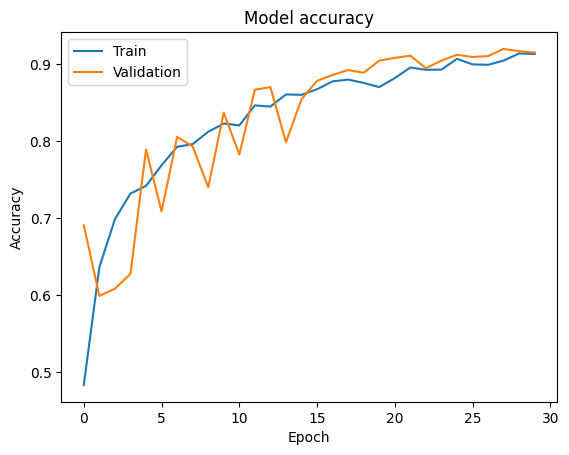

In [ ]:
# Plot training & validation accuracy values
plt.plot(evaluation.history['accuracy'])
plt.plot(evaluation.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model menunjukkan peningkatan akurasi pada data train dan validasi seiring bertambahnya epoch, dengan akurasi validasi yang stabil dan sejalan dengan train di akhir pelatihan, menunjukkan tidak ada overfitting yang signifikan.

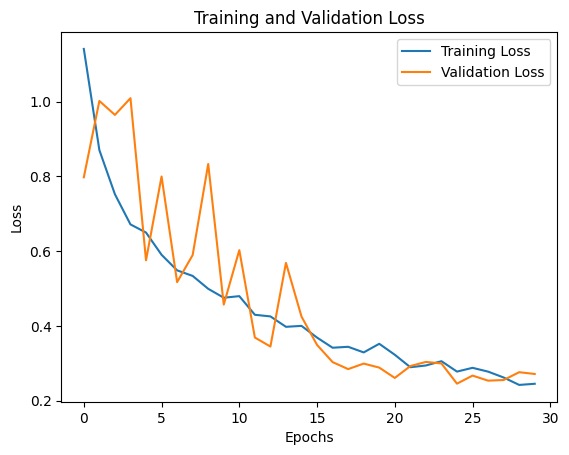

In [ ]:
# Plot Loss
plt.plot(evaluation.history['loss'], label='Training Loss') # Changed h to history
plt.plot(evaluation.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model menunjukkan penurunan loss pada data train dan validasi seiring bertambahnya epoch, dengan validation_loss yang stabil dan sejalan dengan train di akhir pelatihan, menunjukkan tidak ada overfitting yang signifikan.

Selanjutnya menampilkan confusion matrix untuk menunjukkan hasil prediksi untuk model klasifikasi empat kelas: NOTUMOR, MENINGIOMA, GLIOMA, dan PITUITARY.

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


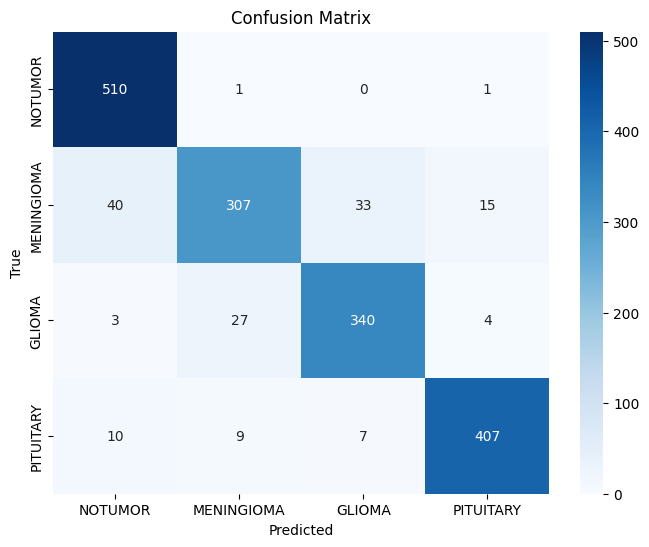

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = cnn.predict(X_test / 255.0)  # Rescale X_test like the training data
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Kesimpulan hasil dari confusion matrix

1. NOTUMOR:
- Benar Positif (True Positives): Sebanyak 510 sampel NOTUMOR diklasifikasikan dengan benar sebagai NOTUMOR.
- Kesalahan (Misclassifications): Ada 1 sampel salah diklasifikasikan sebagai MENINGIOMA, 0 sebagai GLIOMA, dan 1 sebagai PITUITARY.

  Model memiliki kinerja sangat baik dalam mengklasifikasikan NOTUMOR.

2. MENINGIOMA:
- Benar Positif: Sebanyak 307 sampel MENINGIOMA diklasifikasikan dengan benar.
- Kesalahan:
  
  40 sampel diklasifikasikan salah sebagai NOTUMOR.
  
  33 sampel diklasifikasikan salah sebagai GLIOMA.
  
  15 sampel diklasifikasikan salah sebagai PITUITARY.

  Ada tingkat kesalahan yang cukup signifikan untuk kelas ini, menunjukkan bahwa model mungkin perlu perbaikan untuk menangani MENINGIOMA.

3. GLIOMA:
- Benar Positif: Sebanyak 340 sampel GLIOMA diklasifikasikan dengan benar.
- Kesalahan:

  3 sampel diklasifikasikan salah sebagai NOTUMOR.

  27 sampel diklasifikasikan salah sebagai MENINGIOMA.

  4 sampel diklasifikasikan salah sebagai PITUITARY.

  Model cukup akurat dalam mengklasifikasikan GLIOMA, meskipun ada beberapa kesalahan kecil.

4. PITUITARY:
- Benar Positif: Sebanyak 407 sampel PITUITARY diklasifikasikan dengan benar.
- Kesalahan:
  
  10 sampel diklasifikasikan salah sebagai NOTUMOR.

  9 sampel diklasifikasikan salah sebagai MENINGIOMA.

  7 sampel diklasifikasikan salah sebagai GLIOMA.

  Kinerja model untuk PITUITARY cukup baik, meskipun terdapat beberapa misclassifications.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=categories, output_dict=True)

import pandas as pd
df_report = pd.DataFrame(report).transpose()

df_report

,precision,recall,f1-score,support
NOTUMOR,0.905861,0.996094,0.948837,512.000000
MENINGIOMA,0.892442,0.777215,0.830853,395.000000
GLIOMA,0.894737,0.909091,0.901857,374.000000
PITUITARY,0.953162,0.939954,0.946512,433.000000
accuracy,0.912485,0.912485,0.912485,0.912485
macro avg,0.911550,0.905588,0.907015,1714.000000
weighted avg,0.912291,0.912485,0.910808,1714.000000


Model memiliki akurasi keseluruhan sebesar 91.25%. Kelas NOTUMOR dan PITUITARY menunjukkan performa terbaik dengan nilai f1-score tinggi (masing-masing 0.95), sedangkan kelas MENINGIOMA memiliki performa terendah (f1-score 0.83), sehingga perlu perhatian lebih. Performa rata-rata secara keseluruhan konsisten di sekitar 91%.

### **Melakukan Percobaan Prediksi dengan Menginput Gambar diluar Dataset**

In [ ]:
def predict_uploaded_images(model, uploaded_files):
    results = {}
    for fn in uploaded_files.keys():
        try:
            img = load_img(fn, target_size=(150, 150))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array /= 255.0  # Rescale the image

            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction)

            class_labels = ['NOTUMOR', 'MENINGIOMA', 'GLIOMA', 'PITUITARY']  # Replace with your actual class labels
            predicted_label = class_labels[predicted_class]
            results[fn] = predicted_label

        except Exception as e:
            results[fn] = f"Error: {e}"
    return results


# Upload multiple images
uploaded = files.upload()

# Predict the class of the uploaded images
predictions = predict_uploaded_images(cnn, uploaded)

# Print the predictions for each image
for filename, prediction in predictions.items():
    print(f"Prediction for {filename}: {prediction}")

# **Mencoba Melakukan Percobaan Tanpa Augmentasi**

### **Melakukan Evaluasi Model Tanpa Augmentasi**

Line dibawah digunakan untuk melatih model tanpa menggunakan augmentasi data, hanya dengan normalisasi nilai piksel gambar.

1. **Normalisasi Data Latih**: `train_datagen_withoutaug = ImageDataGenerator(rescale=1./255)` membuat objek untuk menormalkan nilai piksel data latih dari skala 0-255 menjadi 0-1. Data latih kemudian diolah menggunakan `train_generator_withoutaug`, yang menghasilkan batch data dengan ukuran 32 tanpa augmentasi.

2. **Normalisasi Data Validasi**: Untuk data validasi, `test_datagen_withoutaug = ImageDataGenerator(rescale=1./255)` digunakan untuk melakukan normalisasi dengan cara yang sama. Data validasi kemudian diolah menggunakan `validation_generator_withoutaug` untuk menghasilkan batch data validasi tanpa augmentasi.

3. **Pelatihan Model Tanpa Augmentasi**: Model CNN dilatih menggunakan generator data latih dan validasi ini. Proses pelatihan dilakukan selama 30 epoch (`epochs=30`), dengan data validasi digunakan untuk mengevaluasi performa model selama pelatihan.

In [ ]:

train_datagen_withoutaug = ImageDataGenerator(rescale=1./255)
train_generator_withoutaug = train_datagen_withoutaug.flow(X_train, y_train, batch_size=32)

test_datagen_withoutaug = ImageDataGenerator(rescale=1./255)
validation_generator_withoutaug = test_datagen_withoutaug.flow(X_test, y_test, batch_size=32)

model_noaugmentasi = cnn.fit(
    train_generator_withoutaug,
    epochs=30,
    validation_data=validation_generator_withoutaug
)

Epoch 1/30
  1/125 ━━━━━━━━━━━━━━━━━━━━ 36s 294ms/step - accuracy: 0.9375 - loss: 0.0865

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9720 - loss: 0.0738 - val_accuracy: 0.9434 - val_loss: 0.1832
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9712 - loss: 0.0792 - val_accuracy: 0.9440 - val_loss: 0.1768
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9709 - loss: 0.0760 - val_accuracy: 0.9557 - val_loss: 0.1684
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9735 - loss: 0.0795 - val_accuracy: 0.9504 - val_loss: 0.1975
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9818 - loss: 0.0573 - val_accuracy: 0.9475 - val_loss: 0.1798
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9788 - loss: 0.0668 - val_accuracy: 0.9527 - val_loss: 0.1776
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9857 - loss: 0.0454 - val_accuracy: 0.9592 - val_loss: 0.1567
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9800 - loss: 0.0466 - val_accuracy: 0.951

### **Menampilkan Hasil Tanpa Augmentasi**

Line dibawah memvisualisasikan performa model selama pelatihan tanpa augmentasi data. Grafik pertama menampilkan akurasi data latih dan validasi pada setiap epoch, memberikan gambaran seberapa baik model belajar dan generalisasi. Jika akurasi data latih terus meningkat tetapi akurasi data validasi stagnan atau menurun, ini menunjukkan model mengalami overfitting. Sebaliknya, jika akurasi pada data latih dan validasi meningkat secara konsisten, model belajar dengan baik. Grafik kedua menunjukkan loss data latih dan validasi, membantu memantau kesalahan prediksi selama pelatihan. Jika loss data latih dan validasi menurun tanpa gap besar, model berhasil melakukan generalisasi dengan baik. Grafik ini berguna untuk mengidentifikasi potensi masalah seperti overfitting atau underfitting pada model.

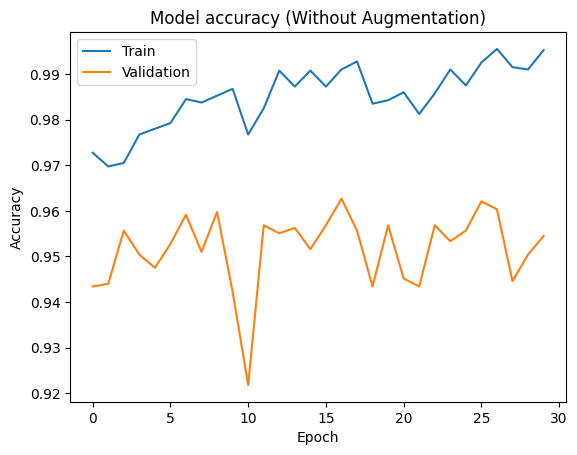

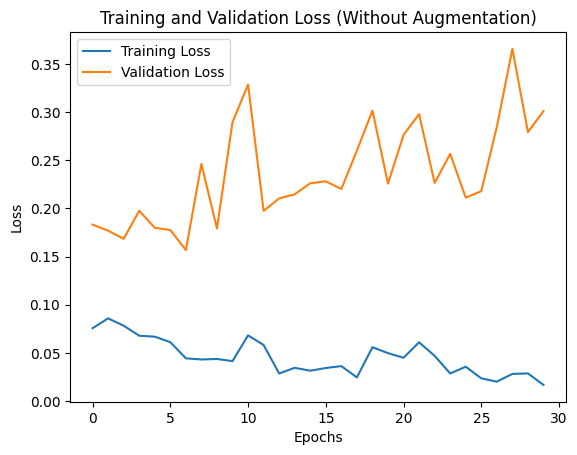

In [ ]:
# Plot training & validation accuracy values
plt.plot(model_noaugmentasi.history['accuracy'])
plt.plot(model_noaugmentasi.history['val_accuracy'])
plt.title('Model accuracy (Without Augmentation)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(model_noaugmentasi.history['loss'], label='Training Loss')
plt.plot(model_noaugmentasi.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Without Augmentation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()